In [1]:
import asyncio
from asyncio import PriorityQueue
from random import randrange
from time import time
import nest_asyncio
from matplotlib.patches import Patch
from objects import Mechanic, Car

In [ ]:
nest_asyncio.apply()  

spent_times = []

async def main():
    global spent_times
    car_queue = PriorityQueue()
    num_cars = 10
    # Symulacja zawierająca 10 samochodów, przy dwóch mechanikach, z róznymi wydajnościami oraz czasem pracy równym 10 godzin 
    mechanic1 = Mechanic(id=1, efficiency=2, work_hours=10)
    mechanic2 = Mechanic(id=2, efficiency=3, work_hours=10)

    await asyncio.gather(
        Car.enqueue_cars(car_queue, num_cars),
        mechanic1.work(car_queue),
        mechanic2.work(car_queue)
    )

    await car_queue.join()
    spent_times = mechanic1.spent_times + mechanic2.spent_times

await main()

Car 1 with 2 priority added to the queue.
Mechanic 1 started repairing car 1 with 2 priority. It will take 1.5 hours.
Mechanic 2 is waiting for cars to repair.
Car 2 with 0 priority added to the queue.
Mechanic 2 started repairing car 2 with 0 priority. It will take 0.6666666666666666 hours.
Car 3 with 1 priority added to the queue.
Car 4 with 0 priority added to the queue.
Car 5 with 1 priority added to the queue.
Mechanic 2 finished repairing car 2. It took 2 hours.
Mechanic 2 started repairing car 3 with 1 priority. It will take 1.3333333333333333 hours.
Car 6 with 0 priority added to the queue.
Mechanic 1 finished repairing car 1. It took 3 hours.
Mechanic 1 started repairing car 5 with 1 priority. It will take 4.0 hours.
Car 7 with 1 priority added to the queue.
Car 8 with 0 priority added to the queue.
Car 9 with 2 priority added to the queue.
Car 10 with 1 priority added to the queue.
Mechanic 2 finished repairing car 3. It took 4 hours.
Mechanic 2 started repairing car 9 with 2

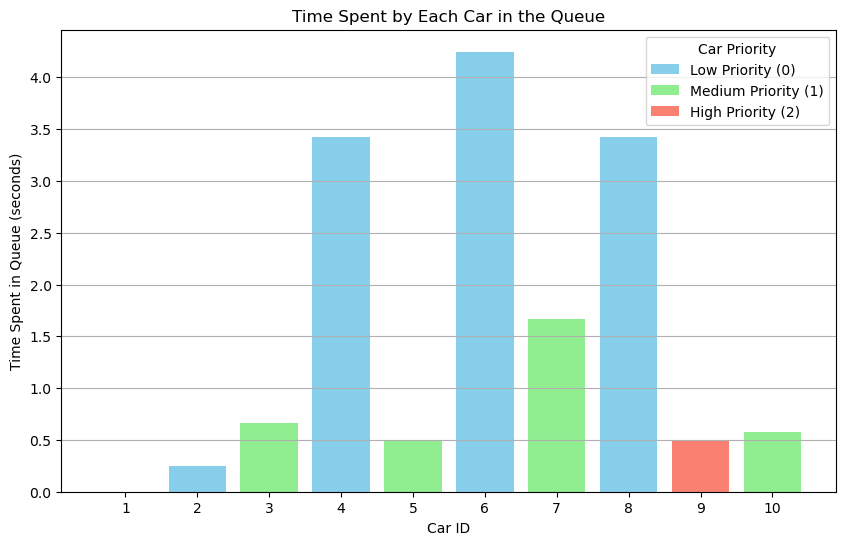

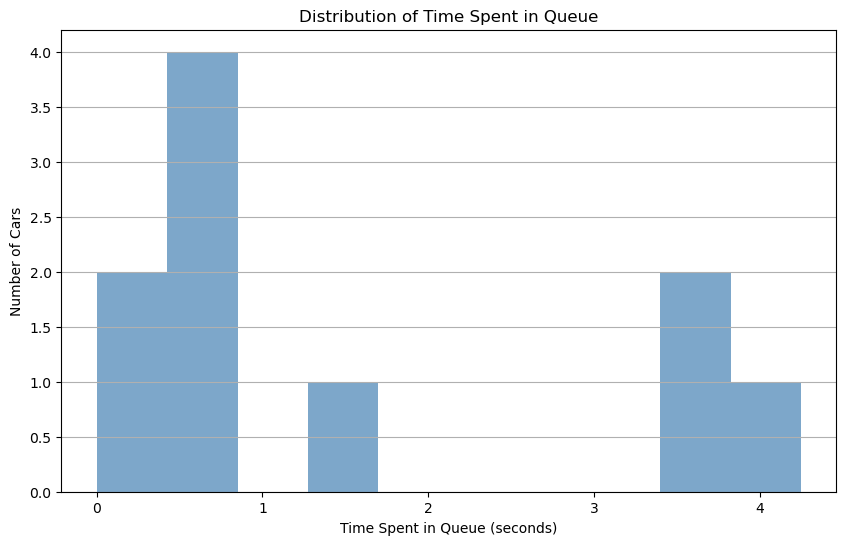

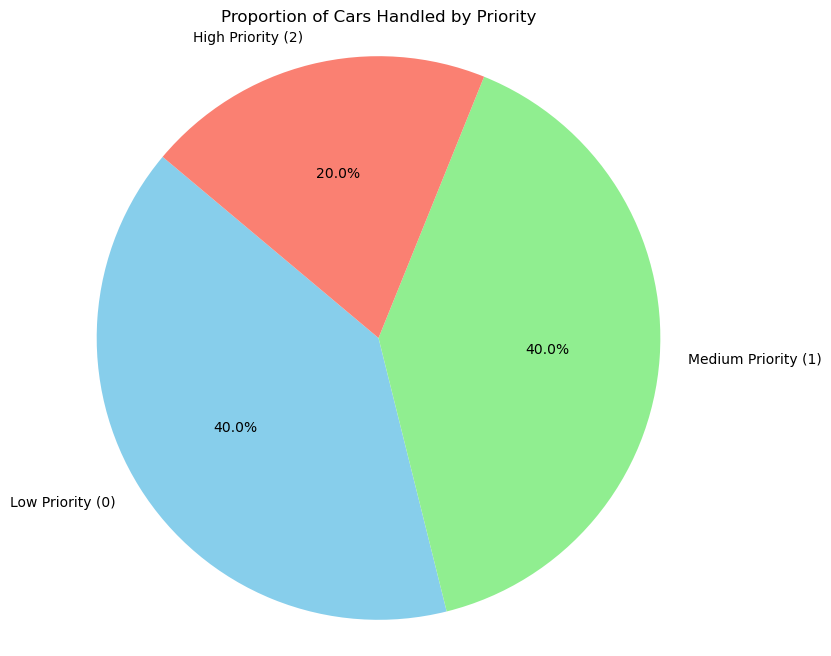

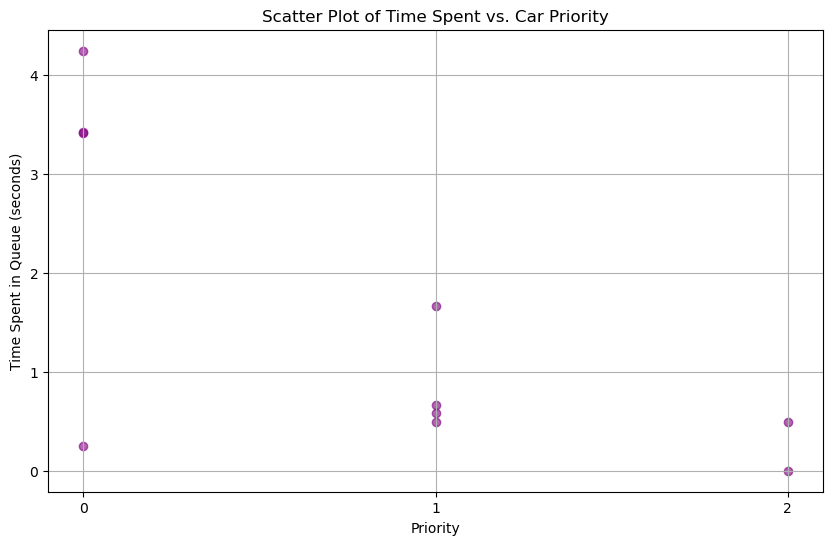

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

if spent_times:
    car_ids = [car_id for car_id, _, _ in spent_times]
    times_spent = [time for _, time, _ in spent_times]
    priorities = [priority for _, _, priority in spent_times]
    
    color_map = {0: 'skyblue', 1: 'lightgreen', 2: 'salmon'}
    colors = [color_map[priority] for priority in priorities]
    
    # Plot 1: Bar Plot - Time Spent in Queue
    plt.figure(figsize=(10, 6))
    plt.bar(car_ids, times_spent, color=colors)
    plt.xlabel('Car ID')
    plt.ylabel('Time Spent in Queue (seconds)')
    plt.title('Time Spent by Each Car in the Queue')
    plt.xticks(car_ids)
    plt.grid(axis='y')

    legend_elements = [
        Patch(facecolor='skyblue', label='Low Priority (0)'),
        Patch(facecolor='lightgreen', label='Medium Priority (1)'),
        Patch(facecolor='salmon', label='High Priority (2)')
    ]
    plt.legend(handles=legend_elements, title="Car Priority")
    plt.show()
    
    # Plot 2: Histogram of Time Spent
    plt.figure(figsize=(10, 6))
    plt.hist(times_spent, bins=10, color='steelblue', alpha=0.7)
    plt.xlabel('Time Spent in Queue (seconds)')
    plt.ylabel('Number of Cars')
    plt.title('Distribution of Time Spent in Queue')
    plt.grid(axis='y')
    plt.show()
    
    # Plot 3: Pie Chart - Total Repairs by Priority
    priority_counts = [0, 0, 0]  # Counts for low, medium, high priority
    for _, _, priority in spent_times:
        priority_counts[priority] += 1
    
    plt.figure(figsize=(8, 8))
    plt.pie(priority_counts, labels=['Low Priority (0)', 'Medium Priority (1)', 'High Priority (2)'],
            autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon'])
    plt.title('Proportion of Cars Handled by Priority')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    plt.show()
    
    # Plot 4: Scatter Plot - Time Spent vs. Priority
    plt.figure(figsize=(10, 6))
    plt.scatter(priorities, times_spent, color='purple', alpha=0.6)
    plt.xlabel('Priority')
    plt.ylabel('Time Spent in Queue (seconds)')
    plt.title('Scatter Plot of Time Spent vs. Car Priority')
    plt.xticks([0, 1, 2])  # Show priority levels on x-axis
    plt.grid(True)
    plt.show()
else:
    print("No data available to plot.")
